# Importing the libraries

In [1]:
import numpy as np
import os
from imutils import paths
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# Reading our dataset

In [2]:
 dataset = r'D:\Study\5th Sem\Image Processing\Corona Virus Recognition Using Chest X Ray Images\Data'

In [3]:
args={}
args["dataset"]=dataset 
args

{'dataset': 'D:\\Study\\5th Sem\\Image Processing\\Corona Virus Recognition Using Chest X Ray Images\\Data'}

In [4]:
iPaths = list(paths.list_images(args["dataset"]))  #image paths 
print(iPaths[0])
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

D:\Study\5th Sem\Image Processing\Corona Virus Recognition Using Chest X Ray Images\Data\Covid\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg


# Plotting the images of normal and covid CXR

In [5]:
Data_Dir = r'D:\Study\5th Sem\Image Processing\Corona Virus Recognition Using Chest X Ray Images\Data//'

In [6]:
Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


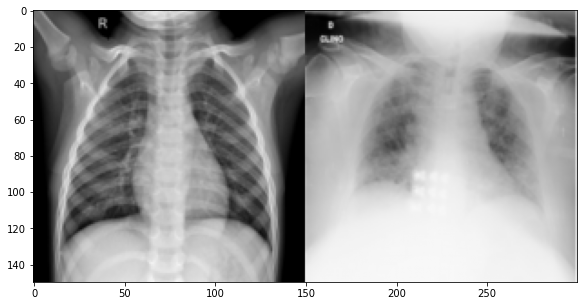

Normal Chest X-ray Vs Covid-19 Chest X-ray


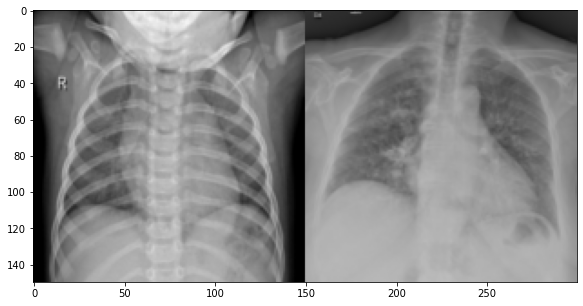

Normal Chest X-ray Vs Covid-19 Chest X-ray


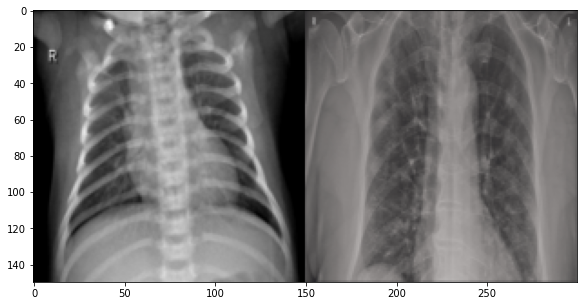

Normal Chest X-ray Vs Covid-19 Chest X-ray


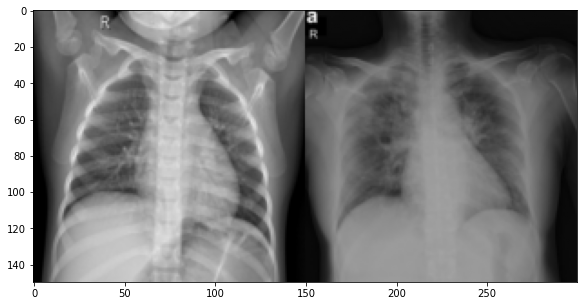

Normal Chest X-ray Vs Covid-19 Chest X-ray


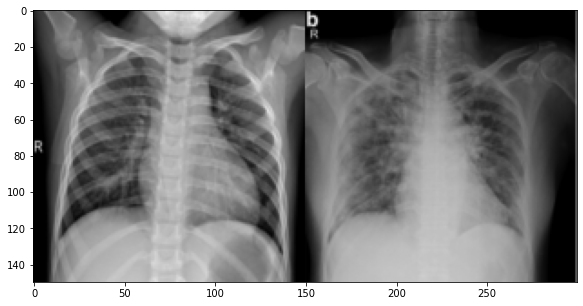

In [7]:
def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

# Labelling our target variable

In [8]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

# Splitting our dataset into training and testing

In [34]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.2, stratify=labels, random_state=42)


In [35]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

# Plotting random CXR

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


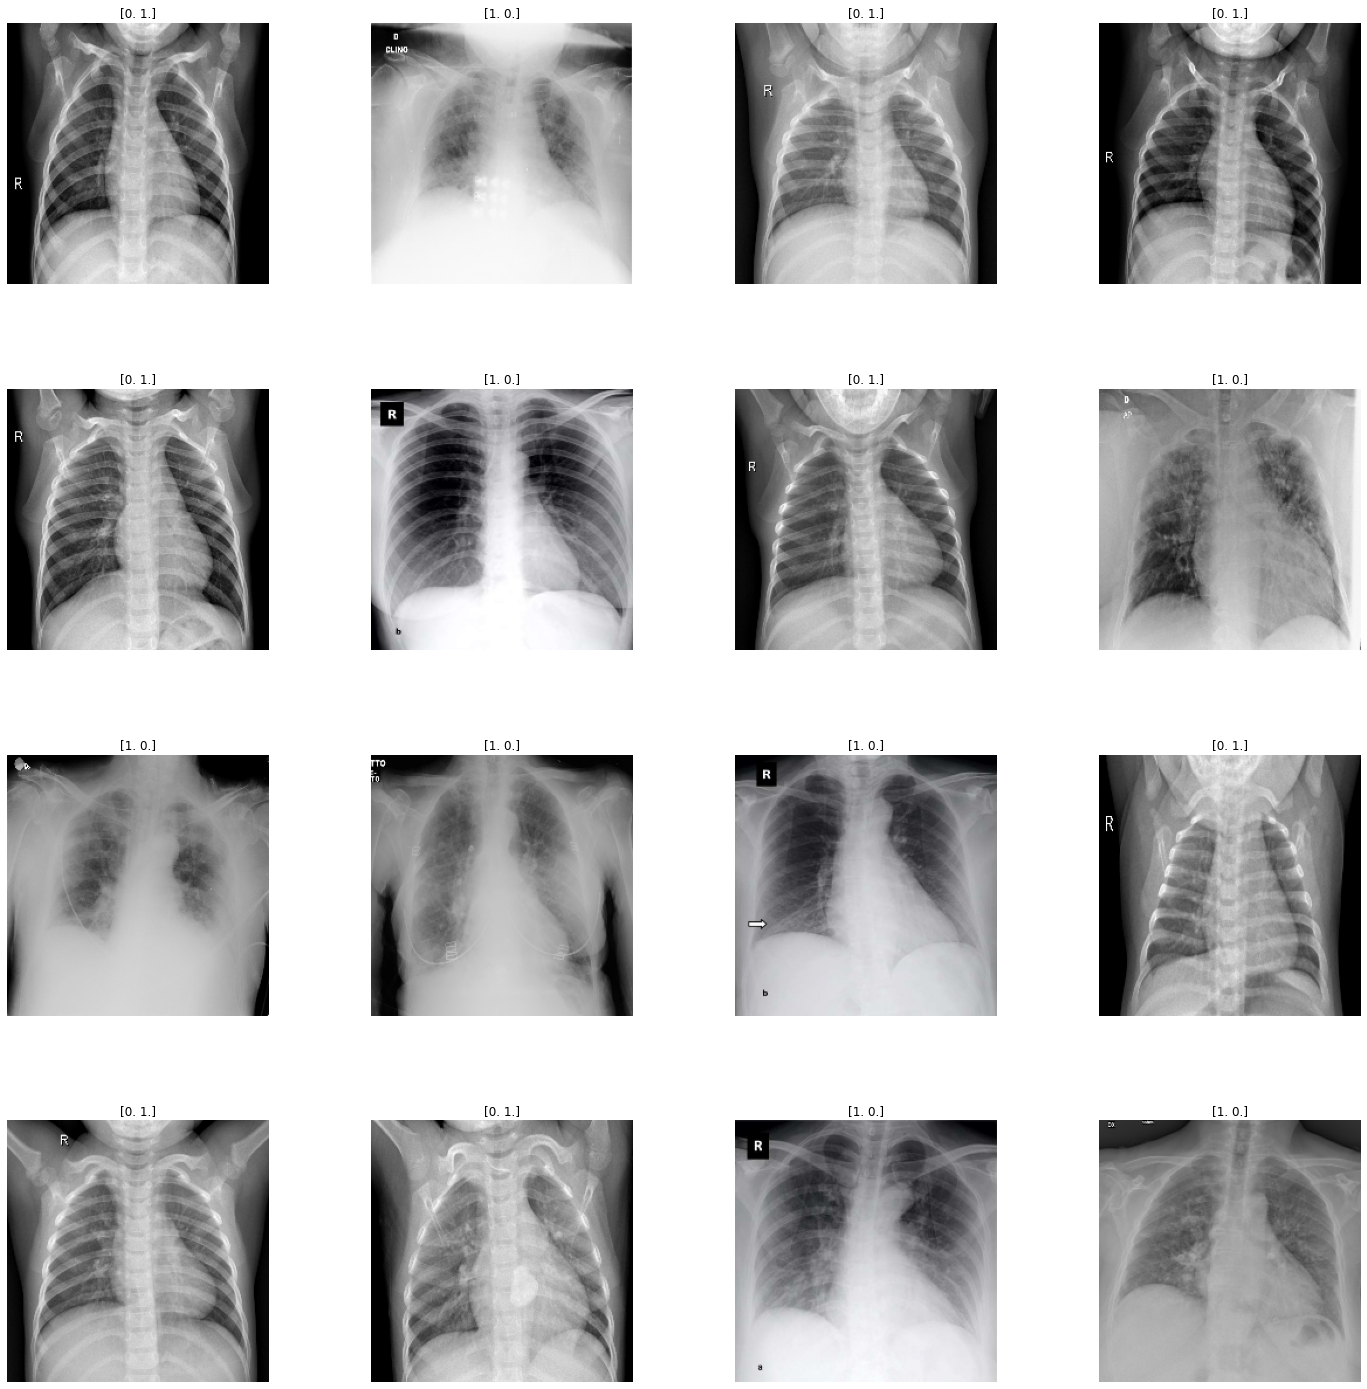

In [36]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Data Augmentation

In [37]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
#valAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

# Loading our VGG16 model

In [38]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel) # for binary its sigmoid for multi-class it is softmax
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [39]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [40]:
opt = Adam(learning_rate=0.001, decay = 0.001 / 10)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit(
    trainAug.flow(X_train, Y_train, batch_size = 8),
    steps_per_epoch=len(X_train) // 8,
    validation_data = (X_test, Y_test),
    #validation_data=valAug.flow(X_test, Y_test , batch_size = 8),
    validation_steps=len(X_test) // 8,
    verbose = 1,
    epochs= 5,
)

Compiling Starts
Epoch 1/5
20/20 [==============================] - 43s 2s/step - loss: 0.6841 - accuracy: 0.5938 - val_loss: 0.6026 - val_accuracy: 0.9000
Epoch 2/5
20/20 [==============================] - 42s 2s/step - loss: 0.5752 - accuracy: 0.8125 - val_loss: 0.5400 - val_accuracy: 0.9250
Epoch 3/5
20/20 [==============================] - 42s 2s/step - loss: 0.4929 - accuracy: 0.8875 - val_loss: 0.4761 - val_accuracy: 0.8750
Epoch 4/5
20/20 [==============================] - 43s 2s/step - loss: 0.4545 - accuracy: 0.8938 - val_loss: 0.4043 - val_accuracy: 0.9750
Epoch 5/5
20/20 [==============================] - 43s 2s/step - loss: 0.3801 - accuracy: 0.9375 - val_loss: 0.3460 - val_accuracy: 0.9750


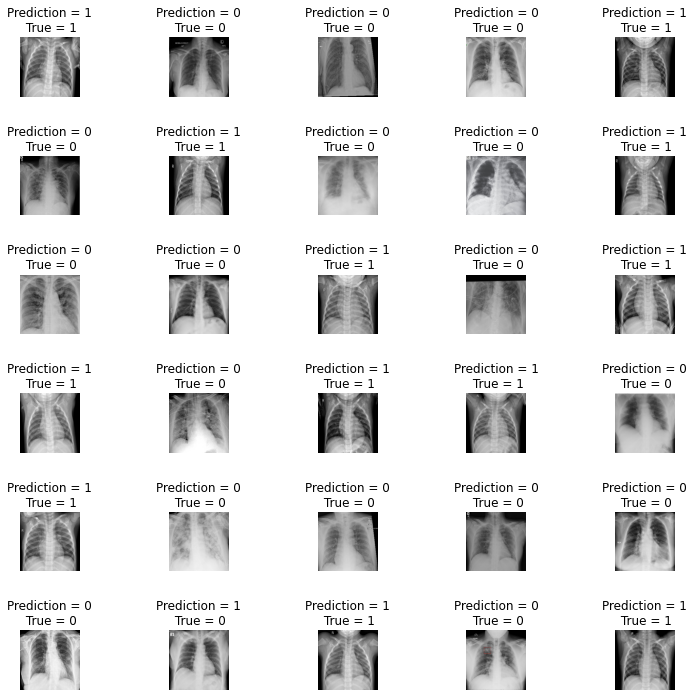

In [41]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=8)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [42]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=8)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      0.95      0.97        20
      Normal       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.975

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 0 20]]
acc: 0.9750
sensitivity: 0.9500
specificity: 1.0000


In [46]:
import seaborn as sns

In [47]:
Y_test.argmax(axis=1).shape

(40,)

<AxesSubplot:>

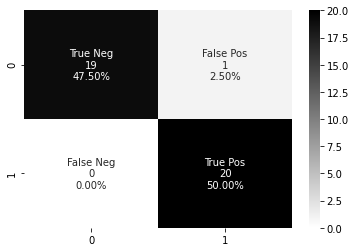

In [51]:
cf_matrix_model = confusion_matrix(Y_test.argmax(axis=1), y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='binary')

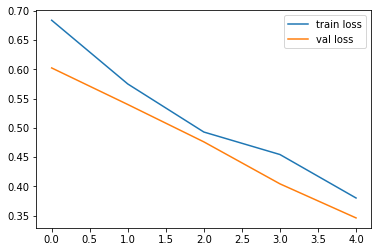

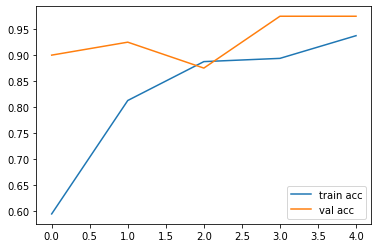

In [52]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()